<a href="https://colab.research.google.com/github/kargilkamera/Aspect-based-sentiment_analysis-/blob/main/hospital%20location%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('/content/loc.csv')


In [ ]:
latitude = data['latitude'].values
longitude = data['longitude'].values



In [ ]:
type(latitude)

numpy.ndarray

In [ ]:
data2= data[['longitude','latitude']]
type(data2)

pandas.core.frame.DataFrame

In [ ]:
data2.head()

,longitude,latitude
0,-122.05,37.37
1,-118.30,34.26
2,-117.81,33.78
3,-118.36,33.82
4,-119.67,36.33


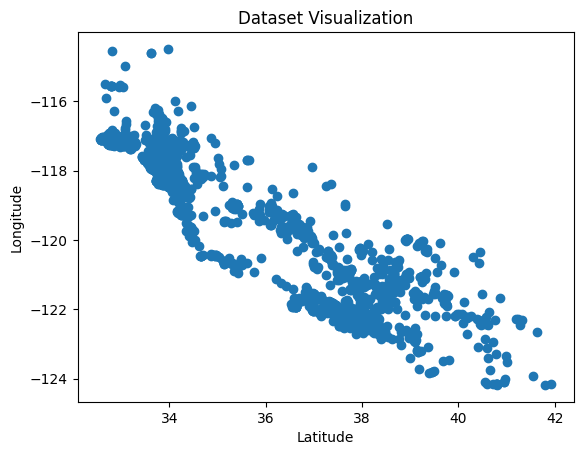

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(latitude, longitude)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Dataset Visualization')
plt.show()


**1. Elbow Method**





In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


data2= data[['latitude','longitude']]
# Range of k values to test
k_values = range(1, 100)

# Sum of squared distances from samples to their closest cluster center
wcss = []

# Perform K-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

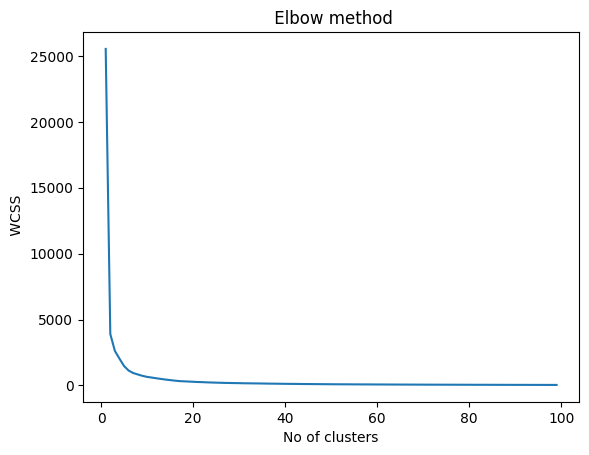

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_values,wcss)
plt.title(" Elbow method")
plt.xlabel("No of clusters")
plt.ylabel(" WCSS")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np



# Number of clusters
k = 7

# Create KMeans object
kmeans = KMeans(n_clusters=k)

# Fit the data
kmeans.fit(data2)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Print the results
print("Cluster labels:",labels)
print(centers)

Cluster labels: [1 0 0 ... 4 0 3]
[[-118.0789249    34.00917787]
 [-122.15941259   37.64344056]
 [-122.74805556   40.10157407]
 [-119.71551724   34.85537931]
 [-119.66630952   36.63845238]
 [-121.14253289   38.47792763]
 [-116.97277966   32.98966102]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


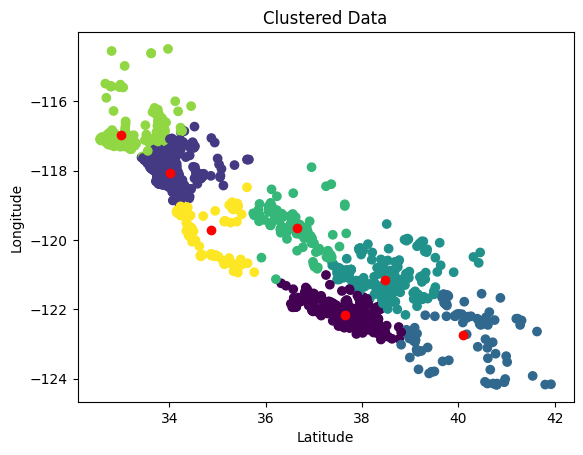

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data_2 = np.column_stack((latitude, longitude))
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_2)
labels = kmeans.labels_
plt.scatter(data['latitude'], data['longitude'], c=labels)
plt.scatter(centers[:,1],centers[:,0],c='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustered Data')
plt.show()


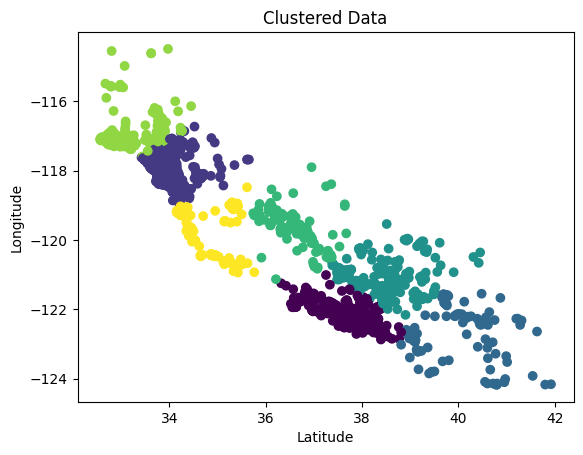

In [ ]:
import matplotlib.pyplot as plt
latitude=data2[['latitude']]
longitude=data2['longitude']
plt.scatter(latitude, longitude ,c=labels)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustered Data')
plt.show()

In [ ]:
import random
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pickle
import csv
df = pd.read_csv('/content/loc.csv')

# Find minimum of first column
min_col1 = df.iloc[:, 0].min()
max_col1 = df.iloc[:, 0].max()
# Find minimum of second column
min_col2 = df.iloc[:, 1].min()
max_col2 = df.iloc[:, 1].max()
print("Minimum of column 1:", min_col1)
print("Minimum of column 2:", min_col2)


print("max:" ,max_col1)
print("max:" ,max_col2)
# Open CSV file and create a CSV reader object
with open('loc.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = next(reader)

    # Create an empty 2D list
    data = []

    # Loop through each row in the CSV file
    for row in reader:

        # Append the row to the 2D list
        data.append(row)
print(data[:5])
for i in range(len(data)):
    data[i][0]=int((float(data[i][0])*100))-int((min_col1*100))
    data[i][1] = int((float(data[i][1]) * 100)) - int((min_col2*100))
    data[i][2]=int(data[i][2])

print(data[:5])

rows=int((int(max_col1*100))-int((min_col1*100)))+1
cols=int(max_col2*100)-int(min_col2*100)+1
print("rows: ",rows)
print("cols: ",cols)

Minimum of column 1: -124.18
Minimum of column 2: 32.56
max: -114.49
max: 41.92
[['-122.05', '37.37', '1537'], ['-118.3', '34.26', '809'], ['-117.81', '33.78', '1484'], ['-118.36', '33.82', '49'], ['-119.67', '36.33', '850']]
[[213, 480, 1537], [588, 170, 809], [637, 122, 1484], [582, 126, 49], [451, 377, 850]]
rows:  970
cols:  937


In [ ]:
New_data=[]

for i in data:
  d=[]
  d.append(i[0])
  d.append(i[1])
  New_data.append(d)


print(New_data)

[[213, 480], [588, 170], [637, 122], [582, 126], [451, 377], [462, 395], [275, 607], [353, 291], [134, 584], [616, 152], [594, 141], [506, 329], [225, 469], [715, 41], [621, 116], [619, 125], [337, 497], [298, 613], [530, 165], [159, 545], [203, 519], [281, 612], [602, 151], [198, 523], [690, 72], [615, 159], [176, 520], [579, 143], [573, 151], [570, 145], [483, 377], [588, 134], [305, 675], [610, 198], [586, 138], [607, 144], [165, 541], [616, 136], [613, 137], [517, 166], [486, 364], [726, 21], [612, 159], [691, 153], [595, 157], [694, 61], [227, 488], [589, 138], [283, 544], [619, 122], [319, 514], [476, 341], [197, 523], [601, 123], [628, 153], [619, 137], [276, 616], [541, 170], [225, 477], [236, 469], [189, 500], [240, 466], [577, 144], [251, 830], [618, 136], [696, 16], [310, 513], [665, 136], [672, 152], [621, 130], [226, 477], [598, 148], [612, 123], [213, 480], [39, 694], [339, 493], [229, 479], [575, 164], [543, 161], [171, 543], [349, 484], [590, 148], [574, 169], [213, 570

In [ ]:
from sklearn.cluster import KMeans
import numpy as np



# Number of clusters
k = 7

# Create KMeans object
kmeans = KMeans(n_clusters=k)

# Fit the data
kmeans.fit(New_data)

# Get the cluster labels
New_d_labels = kmeans.labels_

# Get the cluster centers
New_d_centers = kmeans.cluster_centers_

# Print the results
print("Cluster labels:",New_d_labels)
print(New_d_centers)

Cluster labels: [1 0 0 ... 4 0 6]
[[609.93754941 144.73754941]
 [202.05874126 508.18041958]
 [143.19444444 754.02777778]
 [720.76013514  43.20945946]
 [451.36904762 407.69642857]
 [303.74671053 591.61842105]
 [445.95833333 229.78472222]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
original_data=[]
for i in data:
  d=[]
  d.append(i[0])
  d.append(i[1])
  d.append(i[2])
  original_data.append(d)


print(original_data)


[[213, 480, 1537], [588, 170, 809], [637, 122, 1484], [582, 126, 49], [451, 377, 850], [462, 395, 663], [275, 607, 604], [353, 291, 1341], [134, 584, 1446], [616, 152, 2830], [594, 141, 1288], [506, 329, 564], [225, 469, 535], [715, 41, 1935], [621, 116, 1217], [619, 125, 157], [337, 497, 189], [298, 613, 1603], [530, 165, 654], [159, 545, 3450], [203, 519, 849], [281, 612, 937], [602, 151, 1651], [198, 523, 1410], [690, 72, 4049], [615, 159, 667], [176, 520, 2259], [579, 143, 1030], [573, 151, 3751], [570, 145, 1561], [483, 377, 568], [588, 134, 1530], [305, 675, 1693], [610, 198, 8152], [586, 138, 499], [607, 144, 2650], [165, 541, 700], [616, 136, 956], [613, 137, 883], [517, 166, 2760], [486, 364, 961], [726, 21, 1269], [612, 159, 697], [691, 153, 737], [595, 157, 835], [694, 61, 3925], [227, 488, 799], [589, 138, 1003], [283, 544, 732], [619, 122, 3554], [319, 514, 4356], [476, 341, 426], [197, 523, 1109], [601, 123, 883], [628, 153, 892], [619, 137, 779], [276, 616, 1932], [541, 

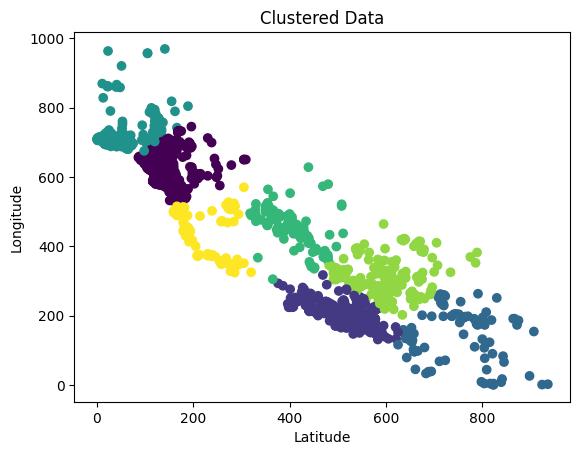

In [ ]:
import matplotlib.pyplot as plt

x_values = [sublist[0] for sublist in New_data]
y_values = [sublist[1] for sublist in New_data]
plt.scatter(y_values,x_values,c=New_d_labels)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustered Data')
plt.show()

In [ ]:
# Assuming you have converted_data as a list of numerical values
# and cluster_assignments as a list of cluster assignments

num_clusters = 7

# Create a list of lists to store values of each cluster
cluster_values = [[] for _ in range(num_clusters)]

# Iterate over the converted_data and cluster_assignments
for i, data_point in enumerate(original_data):
    cluster_id = New_d_labels[i]
    cluster_values[cluster_id].append(data_point)

# Print the values of each cluster
for cluster_id, cluster in enumerate(cluster_values):
    print(f"Cluster {cluster_id}:")
    for data_point in cluster:
        print(data_point)

# Access the values of a specific cluster
specific_cluster_id = 2
specific_cluster_values = cluster_values[specific_cluster_id]
print(f"Values of Cluster {specific_cluster_id}: {specific_cluster_values}")


Cluster 0:
[588, 170, 809]
[637, 122, 1484]
[582, 126, 49]
[616, 152, 2830]
[594, 141, 1288]
[621, 116, 1217]
[619, 125, 157]
[530, 165, 654]
[602, 151, 1651]
[615, 159, 667]
[579, 143, 1030]
[573, 151, 3751]
[570, 145, 1561]
[588, 134, 1530]
[610, 198, 8152]
[586, 138, 499]
[607, 144, 2650]
[616, 136, 956]
[613, 137, 883]
[517, 166, 2760]
[612, 159, 697]
[691, 153, 737]
[595, 157, 835]
[589, 138, 1003]
[619, 122, 3554]
[601, 123, 883]
[628, 153, 892]
[619, 137, 779]
[541, 170, 1825]
[577, 144, 1026]
[618, 136, 1204]
[665, 136, 728]
[672, 152, 2767]
[621, 130, 1265]
[598, 148, 1998]
[612, 123, 1015]
[575, 164, 1942]
[543, 161, 2703]
[590, 148, 1805]
[574, 169, 1481]
[616, 152, 2452]
[605, 159, 579]
[573, 169, 808]
[668, 130, 2866]
[598, 121, 1089]
[588, 146, 1522]
[592, 143, 1807]
[600, 121, 720]
[625, 134, 676]
[623, 107, 1082]
[613, 154, 889]
[533, 161, 220]
[645, 107, 1382]
[577, 144, 268]
[597, 136, 4551]
[637, 128, 1605]
[599, 137, 1614]
[699, 147, 900]
[605, 154, 1396]
[604, 215,

In [ ]:
pops=[]
for i in cluster_values:
  populat=0
  for j in i:
    populat+=j[2]
  pops.append(populat)

print(pops)

[1890749, 929987, 113113, 465943, 200809, 393702, 214093]


In [ ]:
average=int(sum(pops)/len(pops))
print(average)

a=0
for i in pops:
  a=a+1
  if(i>average):
    print("Cluster is",a)

601199
Cluster is 1
Cluster is 2


In [ ]:
#you have to run it only once , so after it ran better comment it
new_cl1=cluster_values[0]
new_cl2=cluster_values[1]
# del cluster_values[1]
# del cluster_values[2]



In [ ]:
sub_cl1=[]
sub_cl2=[]

for i in new_cl1:
  li=[]
  li.append(i[0])
  li.append(i[1])
  sub_cl1.append(li)

for i in new_cl2:
  li=[]
  li.append(i[0])
  li.append(i[1])
  sub_cl2.append(li)

print(new_cl1)
print(sub_cl1)
print(new_cl2)
print(sub_cl2)

[[588, 170, 809], [637, 122, 1484], [582, 126, 49], [616, 152, 2830], [594, 141, 1288], [621, 116, 1217], [619, 125, 157], [530, 165, 654], [602, 151, 1651], [615, 159, 667], [579, 143, 1030], [573, 151, 3751], [570, 145, 1561], [588, 134, 1530], [610, 198, 8152], [586, 138, 499], [607, 144, 2650], [616, 136, 956], [613, 137, 883], [517, 166, 2760], [612, 159, 697], [691, 153, 737], [595, 157, 835], [589, 138, 1003], [619, 122, 3554], [601, 123, 883], [628, 153, 892], [619, 137, 779], [541, 170, 1825], [577, 144, 1026], [618, 136, 1204], [665, 136, 728], [672, 152, 2767], [621, 130, 1265], [598, 148, 1998], [612, 123, 1015], [575, 164, 1942], [543, 161, 2703], [590, 148, 1805], [574, 169, 1481], [616, 152, 2452], [605, 159, 579], [573, 169, 808], [668, 130, 2866], [598, 121, 1089], [588, 146, 1522], [592, 143, 1807], [600, 121, 720], [625, 134, 676], [623, 107, 1082], [613, 154, 889], [533, 161, 220], [645, 107, 1382], [577, 144, 268], [597, 136, 4551], [637, 128, 1605], [599, 137, 161

In [ ]:
import math
n1=math.ceil(pops[0]/average)
n2=math.ceil(pops[1]/average)
print(n1)
print(n2)

print(len(sub_cl1))
print(len(sub_cl2))



4
2
1266
715


In [ ]:
for i in cluster_values:
  print(len(i))

1266
715
108
295
168
304
144


In [ ]:
del cluster_values[0]

In [ ]:
for i in cluster_values:
  print(len(i))

108
295
168
304
144


In [ ]:
del cluster_values[0]

In [ ]:
for i in cluster_values:
  print(len(i))

108
295
168
304
144


In [ ]:
# Before deleting the two clusters
# 1266
# 715
# 167
# 108
# 304
# 295
# 145


In [ ]:
from sklearn.cluster import KMeans
import numpy as np



# Number of clusters
k = 7

# Create KMeans object
kmeans = KMeans(n_clusters=n1)

# Fit the data
kmeans.fit(sub_cl1)

# Get the cluster labels
sub_cl1_labels = kmeans.labels_

# Get the cluster centers
sub_cl1_centers = kmeans.cluster_centers_

# Print the results
print("Cluster labels:",sub_cl1_labels)
print(sub_cl1_centers)

Cluster labels: [0 3 0 ... 3 0 1]
[[586.21075581 148.7252907 ]
 [683.47761194 156.06716418]
 [613.         227.76666667]
 [625.63768116 128.48309179]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


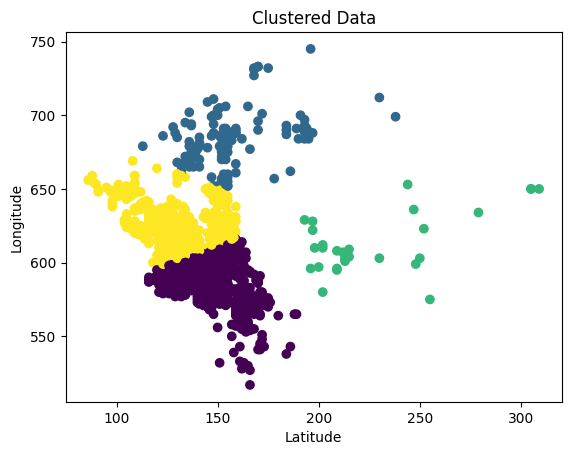

In [ ]:
import matplotlib.pyplot as plt

x_values = [sublist[0] for sublist in sub_cl1]
y_values = [sublist[1] for sublist in sub_cl1]
plt.scatter(y_values,x_values,c=sub_cl1_labels)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustered Data')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np



# Number of clusters
k = n2

# Create KMeans object
kmeans = KMeans(n_clusters=k)

# Fit the data
kmeans.fit(sub_cl2)

# Get the cluster labels
sub_cl2_labels = kmeans.labels_

# Get the cluster centers
sub_cl2_centers = kmeans.cluster_centers_

# Print the results
print("Cluster labels:",sub_cl2_labels)
print(sub_cl2_centers)

Cluster labels: [1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


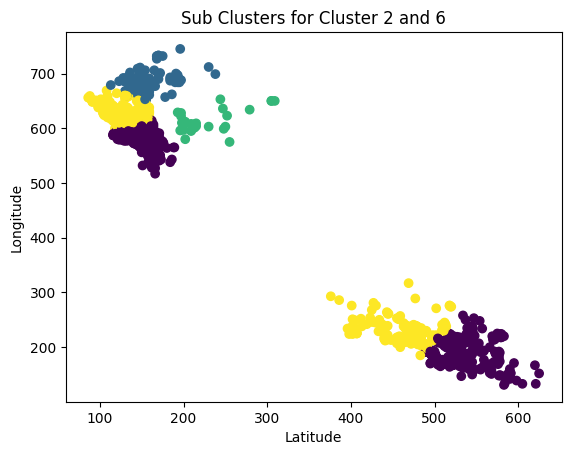

In [ ]:
import matplotlib.pyplot as plt

x_value = [sublist[0] for sublist in sub_cl1]
y_value = [sublist[1] for sublist in sub_cl1]
plt.scatter(y_value,x_value,c=sub_cl1_labels)

x_values = [sublist[0] for sublist in sub_cl2]
y_values = [sublist[1] for sublist in sub_cl2]
plt.scatter(y_values,x_values,c=sub_cl2_labels)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Sub Clusters for Cluster 2 and 6')
plt.show()

In [ ]:
num_clusters = n1

# Create a list of lists to store values of each cluster
sub_cl1_cluster_values = [[] for _ in range(num_clusters)]

# Iterate over the converted_data and cluster_assignments
for i, data_point in enumerate(sub_cl1):
    cluster_id = sub_cl1_labels[i]
    sub_cl1_cluster_values[cluster_id].append(data_point)

# Print the values of each cluster
for cluster_id, cluster in enumerate(sub_cl1_cluster_values):
    print(f"Cluster {cluster_id}:")
    for data_point in cluster:
        print(data_point)

# Access the values of a specific cluster
specific_cluster_id = 1
specific_cluster_values = sub_cl1_cluster_values[specific_cluster_id]
print(f"Values of Cluster {specific_cluster_id}: {specific_cluster_values}")

Cluster 0:
[588, 170]
[582, 126]
[594, 141]
[530, 165]
[602, 151]
[615, 159]
[579, 143]
[573, 151]
[570, 145]
[588, 134]
[586, 138]
[607, 144]
[517, 166]
[612, 159]
[595, 157]
[589, 138]
[541, 170]
[577, 144]
[598, 148]
[575, 164]
[543, 161]
[590, 148]
[574, 169]
[605, 159]
[573, 169]
[588, 146]
[592, 143]
[613, 154]
[533, 161]
[577, 144]
[597, 136]
[599, 137]
[605, 154]
[589, 134]
[586, 134]
[580, 171]
[590, 144]
[580, 134]
[591, 138]
[595, 134]
[604, 161]
[590, 146]
[598, 148]
[597, 133]
[577, 163]
[587, 153]
[588, 125]
[599, 134]
[591, 154]
[583, 136]
[605, 162]
[580, 148]
[578, 144]
[589, 132]
[532, 163]
[554, 166]
[590, 155]
[592, 132]
[598, 138]
[597, 123]
[580, 158]
[568, 168]
[592, 138]
[595, 137]
[578, 148]
[591, 155]
[574, 173]
[582, 140]
[586, 141]
[591, 171]
[579, 140]
[583, 166]
[575, 146]
[613, 159]
[581, 148]
[605, 145]
[610, 152]
[598, 146]
[601, 146]
[588, 141]
[598, 140]
[571, 169]
[568, 161]
[585, 121]
[593, 123]
[588, 118]
[580, 162]
[605, 154]
[588, 116]
[574, 143]

In [ ]:
num_clusters = n2

# Create a list of lists to store values of each cluster
sub_cl2_cluster_values = [[] for _ in range(num_clusters)]

# Iterate over the converted_data and cluster_assignments
for i, data_point in enumerate(sub_cl2):
    cluster_id = sub_cl2_labels[i]
    sub_cl2_cluster_values[cluster_id].append(data_point)

# Print the values of each cluster
for cluster_id, cluster in enumerate(sub_cl2_cluster_values):
    print(f"Cluster {cluster_id}:")
    for data_point in cluster:
        print(data_point)

# Access the values of a specific cluster
specific_cluster_id = 1
specific_cluster_values = sub_cl2_cluster_values[specific_cluster_id]
print(f"Values of Cluster {specific_cluster_id}: {specific_cluster_values}")

Cluster 0:
[134, 584]
[159, 545]
[203, 519]
[198, 523]
[176, 520]
[165, 541]
[197, 523]
[189, 500]
[171, 543]
[213, 570]
[178, 505]
[218, 541]
[196, 528]
[195, 523]
[175, 518]
[216, 540]
[171, 523]
[176, 516]
[184, 500]
[193, 523]
[198, 523]
[189, 498]
[215, 504]
[173, 516]
[194, 498]
[214, 541]
[202, 519]
[208, 512]
[190, 530]
[192, 498]
[190, 578]
[200, 522]
[175, 516]
[238, 543]
[160, 590]
[171, 522]
[253, 547]
[187, 545]
[171, 514]
[210, 532]
[210, 508]
[151, 588]
[178, 503]
[188, 541]
[204, 512]
[153, 566]
[189, 500]
[211, 544]
[211, 509]
[149, 578]
[148, 579]
[171, 513]
[193, 523]
[194, 493]
[193, 527]
[149, 588]
[167, 620]
[183, 541]
[207, 509]
[173, 518]
[176, 520]
[201, 516]
[196, 529]
[190, 523]
[177, 519]
[210, 509]
[190, 529]
[178, 516]
[133, 605]
[165, 530]
[174, 509]
[168, 504]
[221, 541]
[189, 526]
[174, 520]
[175, 522]
[165, 539]
[173, 545]
[191, 528]
[163, 541]
[214, 572]
[214, 532]
[174, 516]
[168, 521]
[224, 538]
[168, 520]
[211, 540]
[152, 591]
[218, 580]
[225, 545]

In [ ]:
import random
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pickle


class Space():

    def __init__(self, height, width, num_hospitals):
        """Create a new state space with given dimensions."""
        self.height = height
        self.width = width
        self.num_hospitals = num_hospitals
        self.houses = set()
        self.hospitals = set()
        self.centroids = list()

    def add_house(self, row, col):
        """Add a house at a particular location in state space."""
        self.houses.add((row, col))


    def available_spaces(self):
        """Returns all cells not currently used by a house or hospital."""

        # Consider all possible cells
        candidates = set(
            (row, col)
            for row in range(self.height)
            for col in range(self.width)
        )


        # Remove all houses and hospitals
        for house in self.houses:
            candidates.remove(house)
        for hospital in self.hospitals:
            candidates.remove(hospital)
        return candidates

    def hill_climb(self, maximum=None, image_prefix=None, log=False):

        count = 0

        X = np.array(houses)
        kmeans = KMeans(n_clusters=n_hospitals, random_state=0).fit(X)
        cent = kmeans.cluster_centers_

        for i in range(len(cent)):
            self.centroids.append([int(cent[i][0]), int(cent[i][1])])

        self.hospitals = set()
        spaces = list(self.available_spaces())
        for i in range(self.num_hospitals):
            if self.centroids[i] in spaces:
                self.hospitals.add(self.centroids[i])
            else:
                dist=abs(self.centroids[i][0] - spaces[0][0]) + abs(self.centroids[i][1] - spaces[0][1])
                for spc in spaces:
                    if(abs(self.centroids[i][0] - spc[0]) + abs(self.centroids[i][1] - spc[1])<dist):
                        dist=abs(self.centroids[i][0] - spc[0]) + abs(self.centroids[i][1] - spc[1])
                        pos=spc

                place=random.choice(list(self.available_spaces()))
                dist=abs(self.centroids[i][0] - place[0]) + abs(self.centroids[i][1] - place[1])
                for k in range(5):
                    a=random.choice(list(self.available_spaces()))
                    if(dist>abs(self.centroids[i][0] - a[0]) + abs(self.centroids[i][1] - a[1])):
                        dist=abs(self.centroids[i][0] - a[0]) + abs(self.centroids[i][1] - a[1])
                        place=a



                self.hospitals.add(place)


        while maximum is None or count < maximum:
            count += 1
            best_neighbors = []
            best_neighbor_cost = None


            for hospital in self.hospitals:
                for replacement in self.get_neighbors(*hospital):

                    neighbor = self.hospitals.copy()
                    neighbor.remove(hospital)
                    neighbor.add(replacement)

                    cost = self.get_cost2(neighbor)
                    if best_neighbor_cost is None or cost < best_neighbor_cost:
                        best_neighbor_cost = cost
                        best_neighbors = [neighbor]
                    elif best_neighbor_cost == cost:
                        best_neighbors.append(neighbor)


            if best_neighbor_cost >= self.get_cost2(self.hospitals):
                return self.hospitals

            else:
                if log:
                    best_neighbor_cost2 = self.get_cost2(self.hospitals)
                    print(f"Found better neighbor: cost {best_neighbor_cost2}")
                self.hospitals = random.choice(best_neighbors)



    def random_restart(self, maximum, image_prefix=None, log=False):
        best_hospitals = None
        best_cost = None

        # Repeat hill-climbing a fixed number of times
        for i in range(maximum):
            hospitals = self.hill_climb()
            cost = self.get_cost2(hospitals)
            if best_cost is None or cost < best_cost:
                best_cost = cost
                best_hospitals = hospitals
                if log:
                    print(f"{i}: Found new best state: cost {cost}")
            else:
                if log:
                    print(f"{i}: Found state: cost {cost}")

        return best_hospitals

    def get_cost(self, hospitals):

        cost = 0
        for centroid in self.centroids:
            cost += min(
                abs(centroid[0] - hospital[0]) + abs(centroid[1] - hospital[1])
                for hospital in hospitals
            )
        return cost

    def get_cost2(self, hospitals):

        cost = 0
        for house in self.houses:
            cost += min(
                abs(house[0] - hospital[0]) + abs(house[1] - hospital[1])
                for hospital in hospitals
            )
        return cost

    def get_neighbors(self, row, col):
        candidates = [
            (row - 1, col),
            (row + 1, col),
            (row, col - 1),
            (row, col + 1),
            (row+1, col + 1),
            (row-1, col + 1),
            (row+1, col - 1),
            (row - 1, col - 1)
        ]
        neighbors = []
        for r, c in candidates:
            if (r, c) in self.houses or (r, c) in self.hospitals:
                continue
            if 0 <= r < self.height and 0 <= c < self.width:
                neighbors.append((r, c))
        return neighbors

In [ ]:
# n_hospitals=5
# n_houses=len(data)
# houses=data
# s = Space(height=rows, width=cols, num_hospitals=n_hospitals)
# for i in range(n_houses):
#     s.add_house(houses[i][0], houses[i][1])

# # Use local search to determine hospital placement
# hospitals = s.hill_climb(image_prefix="hospitals", log=True)

In [ ]:
n_hospitals=1

hos=[]


for clust in cluster_values:
  c_houses=[]
  for data_point in clust:
        house = [data_point[0], data_point[1]]
        c_houses.append(house)

  s = Space(height=rows, width=cols, num_hospitals=n_hospitals)
  for i in range(len(c_houses)):
     s.add_house(c_houses[i][0], c_houses[i][1])

  hospitals = s.hill_climb(image_prefix="hospitals", log=True)
  hos.append(hospitals)


# Use local search to determine hospital placement
#

NameError: ignored

In [ ]:
for clust in sub_cl1_cluster_values:
  c_houses=[]
  for data_point in clust:
        house = [data_point[0], data_point[1]]
        c_houses.append(house)

  s = Space(height=rows, width=cols, num_hospitals=n_hospitals)
  for i in range(len(c_houses)):
     s.add_house(c_houses[i][0], c_houses[i][1])

  hospitals = s.hill_climb(image_prefix="hospitals", log=True)
  hos.append(hospitals)

NameError: ignored

In [ ]:
for clust in sub_cl2_cluster_values:
  c_houses=[]
  for data_point in clust:
        house = [data_point[0], data_point[1]]
        c_houses.append(house)

  s = Space(height=rows, width=cols, num_hospitals=n_hospitals)
  for i in range(len(c_houses)):
     s.add_house(c_houses[i][0], c_houses[i][1])

  hospitals = s.hill_climb(image_prefix="hospitals", log=True)
  hos.append(hospitals)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Found better neighbor: cost 301902
Found better neighbor: cost 301122
Found better neighbor: cost 300342
Found better neighbor: cost 299562
Found better neighbor: cost 298782
Found better neighbor: cost 298002
Found better neighbor: cost 297222
Found better neighbor: cost 296442
Found better neighbor: cost 295662
Found better neighbor: cost 294882
Found better neighbor: cost 294102
Found better neighbor: cost 293322
Found better neighbor: cost 292542
Found better neighbor: cost 291762
Found better neighbor: cost 290982
Found better neighbor: cost 290202
Found better neighbor: cost 289422
Found better neighbor: cost 288642
Found better neighbor: cost 287862
Found better neighbor: cost 287082
Found better neighbor: cost 286302
Found better neighbor: cost 285522
Found better neighbor: cost 284742
Found better neighbor: cost 283962
Found better neighbor: cost 283182
Found better neighbor: cost 282402
Found better neighbor: cost 281622
Found better neighbor: cost 280842
Found better neighbo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Found better neighbor: cost 43685
Found better neighbor: cost 43235
Found better neighbor: cost 42787
Found better neighbor: cost 42339
Found better neighbor: cost 41891
Found better neighbor: cost 41443
Found better neighbor: cost 40995
Found better neighbor: cost 40549
Found better neighbor: cost 40103
Found better neighbor: cost 39657
Found better neighbor: cost 39211
Found better neighbor: cost 38765
Found better neighbor: cost 38325
Found better neighbor: cost 37885
Found better neighbor: cost 37449
Found better neighbor: cost 37013
Found better neighbor: cost 36577
Found better neighbor: cost 36143
Found better neighbor: cost 35709
Found better neighbor: cost 35275
Found better neighbor: cost 34843
Found better neighbor: cost 34411
Found better neighbor: cost 33979
Found better neighbor: cost 33547
Found better neighbor: cost 33117
Found better neighbor: cost 32687
Found better neighbor: cost 32259
Found better neighbor: cost 31835
Found better neighbor: cost 31411
Found better n

In [ ]:
print(hos)


[{(708, 26)}, {(454, 234)}, {(449, 414)}, {(290, 600)}, {(173, 759)}, {(625, 128)}, {(587, 171)}, {(684, 156)}, {(607, 213)}, {(188, 527)}, {(226, 475)}]


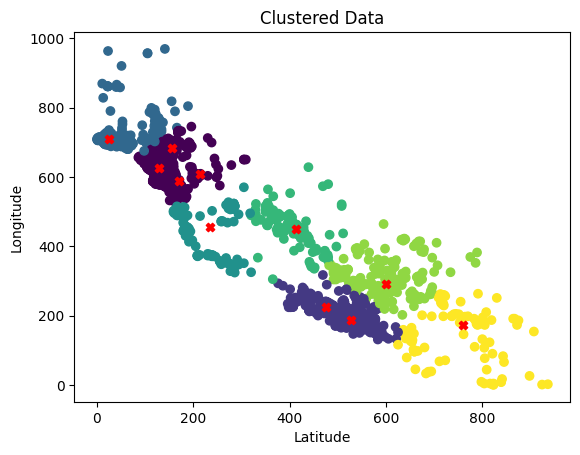

In [ ]:
import matplotlib.pyplot as plt

x_values = [sublist[0] for sublist in New_data]
y_values = [sublist[1] for sublist in New_data]
hos_list = list(hos)
x_ = []
y_ = []
for coord in hos_list:
  for i in coord:
    x_.append(i[0])
    y_.append(i[1])
plt.scatter(y_values,x_values,c=New_d_labels)
plt.scatter(y_,x_,c='r',marker='X')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustered Data')
plt.show()

In [ ]:
hos_list=[]
for h in hos:
  li=list(h)
  hos_list.append(li)

print(hos_list)

[[(708, 26)], [(454, 234)], [(449, 414)], [(290, 600)], [(173, 759)], [(625, 128)], [(587, 171)], [(684, 156)], [(607, 213)], [(188, 527)], [(226, 475)]]


In [ ]:
hos_li=[[(708, 26)], [(454, 234)], [(449, 414)], [(290, 600)], [(173, 759)], [(625, 128)], [(587, 171)], [(684, 156)], [(607, 213)], [(188, 527)], [(226, 475)]]
hos_lis=[]
for h in hos_li:
  for li in h:
       new_li=list(li)
       hos_lis.append(new_li)

print(hos_lis)

[[708, 26], [454, 234], [449, 414], [290, 600], [173, 759], [625, 128], [587, 171], [684, 156], [607, 213], [188, 527], [226, 475]]


In [ ]:
# Minimum of column 1: -124.18
# Minimum of column 2: 32.56
min1=-124.18
min2=32.56
new_loc=[]
for i in hos_lis:
  i[0]=(float(i[0]/100)+min1)
  i[1]=(float(i[1]/100)+min2)
  i[0] = "{:.2f}".format(i[0])
  i[1] = "{:.2f}".format(i[1])
  new_loc.append(i)

In [ ]:
print(new_loc)

[['-117.10', '32.82'], ['-119.64', '34.90'], ['-119.69', '36.70'], ['-121.28', '38.56'], ['-122.45', '40.15'], ['-117.93', '33.84'], ['-118.31', '34.27'], ['-117.34', '34.12'], ['-118.11', '34.69'], ['-122.30', '37.83'], ['-121.92', '37.31']]


In [ ]:
import pandas as pd
from tabulate import tabulate

# Given data
data1 = [[708, 26], [454, 234], [449, 414], [290, 600], [173, 759], [625, 128], [587, 171], [684, 156], [607, 213], [188, 527], [226, 475]]
data2 = [['-117.10', '32.82'], ['-119.64', '34.90'], ['-119.69', '36.70'], ['-121.28', '38.56'], ['-122.45', '40.15'], ['-117.93', '33.84'], ['-118.31', '34.27'], ['-117.34', '34.12'], ['-118.11', '34.69'], ['-122.30', '37.83'], ['-121.92', '37.31']]

# Create DataFrames from the given data
columns1 = ['New_point[x]', 'New_point[y]']
columns2 = ['point[x]', 'point[y]']

df1 = pd.DataFrame(data1, columns=columns1)
df2 = pd.DataFrame(data2, columns=columns2)

# Concatenate the DataFrames horizontally
result = pd.concat([df1, df2], axis=1)

# Convert DataFrame to tabulate format
table = tabulate(result, headers='keys', tablefmt='pretty', showindex=False)

# Print the table with borders
print(table)


+--------------+--------------+----------+----------+
| New_point[x] | New_point[y] | point[x] | point[y] |
+--------------+--------------+----------+----------+
|     708      |      26      | -117.10  |  32.82   |
|     454      |     234      | -119.64  |  34.90   |
|     449      |     414      | -119.69  |  36.70   |
|     290      |     600      | -121.28  |  38.56   |
|     173      |     759      | -122.45  |  40.15   |
|     625      |     128      | -117.93  |  33.84   |
|     587      |     171      | -118.31  |  34.27   |
|     684      |     156      | -117.34  |  34.12   |
|     607      |     213      | -118.11  |  34.69   |
|     188      |     527      | -122.30  |  37.83   |
|     226      |     475      | -121.92  |  37.31   |
+--------------+--------------+----------+----------+


In [ ]:
import pandas as pd

# Given data
data1 = [[708, 26], [454, 234], [449, 414], [290, 600], [173, 759], [625, 128], [587, 171], [684, 156], [607, 213], [188, 527], [226, 475]]
data2 = [['-117.10', '32.82'], ['-119.64', '34.90'], ['-119.69', '36.70'], ['-121.28', '38.56'], ['-122.45', '40.15'], ['-117.93', '33.84'], ['-118.31', '34.27'], ['-117.34', '34.12'], ['-118.11', '34.69'], ['-122.30', '37.83'], ['-121.92', '37.31']]

# Create DataFrames from the given data
columns1 = ['Column1', 'Column2']
columns2 = ['Column3', 'Column4']

df1 = pd.DataFrame(data1, columns=columns1)
df2 = pd.DataFrame(data2, columns=columns2)

# Concatenate the DataFrames horizontally
result = pd.concat([df1, df2], axis=1)

# Convert DataFrame to a table string representation with lines
table = result.to_string(index=False, index_names=False, justify='right', line_width=200)

# Print the table
print(table)


 Column1  Column2 Column3 Column4
     708       26 -117.10   32.82
     454      234 -119.64   34.90
     449      414 -119.69   36.70
     290      600 -121.28   38.56
     173      759 -122.45   40.15
     625      128 -117.93   33.84
     587      171 -118.31   34.27
     684      156 -117.34   34.12
     607      213 -118.11   34.69
     188      527 -122.30   37.83
     226      475 -121.92   37.31


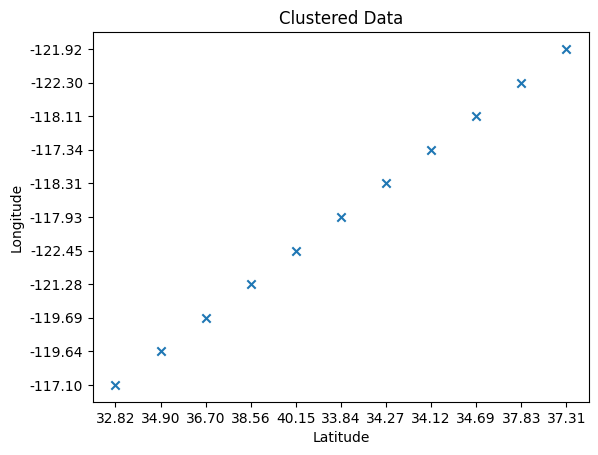

In [ ]:
import matplotlib.pyplot as plt
latitude=data2[['latitude']]
longitude=data2['longitude']

plt.scatter(latitude, longitude ,c=labels)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustered Data')
plt.show()

In [ ]:
x=[]
y=[]
for li in new_loc:
  a=float(li[1])
  b=float(li[0])
  x.append(a)
  y.append(b)
print(x)

[32.82, 34.9, 36.7, 38.56, 40.15, 33.84, 34.27, 34.12, 34.69, 37.83, 37.31]


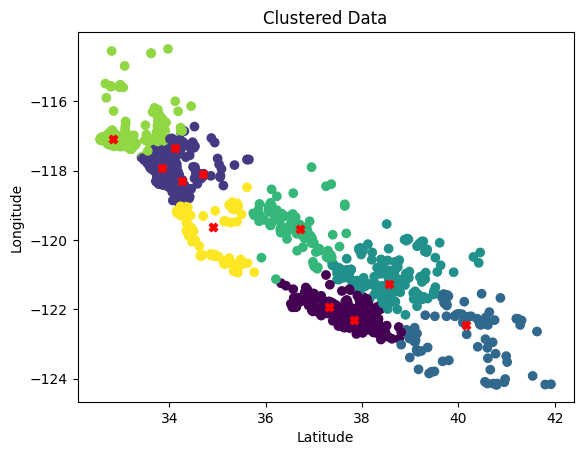

In [ ]:
import matplotlib.pyplot as plt
latitude=data2[['latitude']]
longitude=data2['longitude']
plt.scatter(latitude, longitude ,c=labels)
plt.scatter(x,y,c='r',marker='X')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustered Data')
plt.show()